# Basic footprinting run

In [1]:
import numpy as np
import pandas as pd
from mayavi import mlab
from sklearn_extra.cluster import KMedoids
from filewriter.AIP_writer import AIPWriter
from aip_footprinting.AIP_footprinting import KMC_footprint
from aip_footprinting.AIP_footprinting_byIn import KMC_footprint_byIn
from aip_footprinting.AIP_footprinting_script import KMC_footprint_script
from aip_footprinting.visualise import visualise

In [ ]:
dirr = "/home/kate/workspace/X3LYP/monomer_X3LYP/XLYOFNOQVPJJNP-UHFFFAOYSA-N"
k = KMC_footprint_script(dirr+".cml", dirr+"_0.0600_merged.cube", dirr+"_0.0104_merged.cube", dirr+"_0.0020_merged.cube",centre_surface_percentile=100)

In [4]:
visualise(k.AIP, "charge", isosurface="0.0300")

In [6]:
from aip_footprinting.define_AIP import define_extreme_AIP, define_kmedoid_AIP_value_polar, \
    define_kmedoid_AIP_value_critical_point, define_extreme_geometric_AIP, \
    define_kmedoid_AIP_value_centre, define_hydrogen, define_single_cluster, \
    excise_lone_pairs, define_geom_sigma_holes
MEPS_p_df = k.MEPS_p.MEPS_df[k.MEPS_p.MEPS_owner == 7]
atom = k.Atom.Atom[7]
A1 = define_extreme_AIP(MEPS_p_df, atom, polar=True)

In [8]:
k = KMC_footprint("chlorobenzene", centre_surface_percentile=80)

In [3]:
k = KMC_footprint_byIn("CZSJZODSDLOLEU-UHFFFAOYSA-N")

In [21]:
k.write_xml("/home/kate/workspace/newssip/dataset/xml/LAQPNDIUHRHNCV-UHFFFAOYSA-N.xml")

In [6]:
0.085275 * 20.480692125613984 -0.635957374783155

1.1105336462285775

In [4]:
for aip in k.AIP.AIP:
        print(aip.value, aip.atom_type, aip.isosurface, aip.mepsvalue, aip.fraction, aip.atom_owner_index)

-0.08 F 0.03 0.00259 1.0 0
-0.09 F 0.03 0.002529 1.0 2
-0.1 F 0.03 0.002415 1.0 3
1.11 H.soft 0.0104 0.085275 1.0 15
1.11 H.soft 0.0104 0.085403 1.0 16
0.75 H.soft 0.0104 0.067519 1.0 17
0.75 H.soft 0.0104 0.067514 1.0 18
0.73 H.soft 0.0104 0.066627 1.0 19
0.73 H.soft 0.0104 0.066452 1.0 20
0.63 H.soft 0.0104 0.061944 1.0 21
0.63 H.soft 0.0104 0.062 1.0 22
0.6 H.soft 0.0104 0.060314 1.0 23
0.6 H.soft 0.0104 0.06039 1.0 24
0.56 H.soft 0.0104 0.058619 1.0 25
0.56 H.soft 0.0104 0.058533 1.0 26
0.54 H.soft 0.0104 0.057648 1.0 27
0.54 H.soft 0.0104 0.057465 1.0 28
0.53 H.soft 0.0104 0.056888 1.0 29
0.52 H.soft 0.0104 0.056622 1.0 30
0.52 H.soft 0.0104 0.056283 1.0 31
0.52 H.soft 0.0104 0.056251 1.0 32
0.52 H.soft 0.0104 0.05649 1.0 33
0.52 H.soft 0.0104 0.056398 1.0 34
0.59 H.soft 0.0104 0.059889 1.0 35
0.59 H.soft 0.0104 0.059851 1.0 36
0.6 H.soft 0.0104 0.06058 1.0 37


In [5]:
for a in k.Atom.Atom:
    print(a.index, a.atom_type, k.AIP.sai_01[a.index])

0 C.ar 7.388712314188898
1 C.ar 11.035931550618665
2 C.ar 10.44672004231014
3 C.ar 10.613663302997555
4 C.ar 10.405475236728543
5 C.ar 10.847383867959937
6 C.3 5.2321981937796975
7 F 10.678476568911492
8 F 10.391726968201345
9 F 10.50956926986305
10 H.soft 3.8121984587561535
11 H.soft 3.5686577019886303
12 H.soft 4.053775177162649
13 H.soft 3.778809806618671
14 H.soft 3.7414930777591304


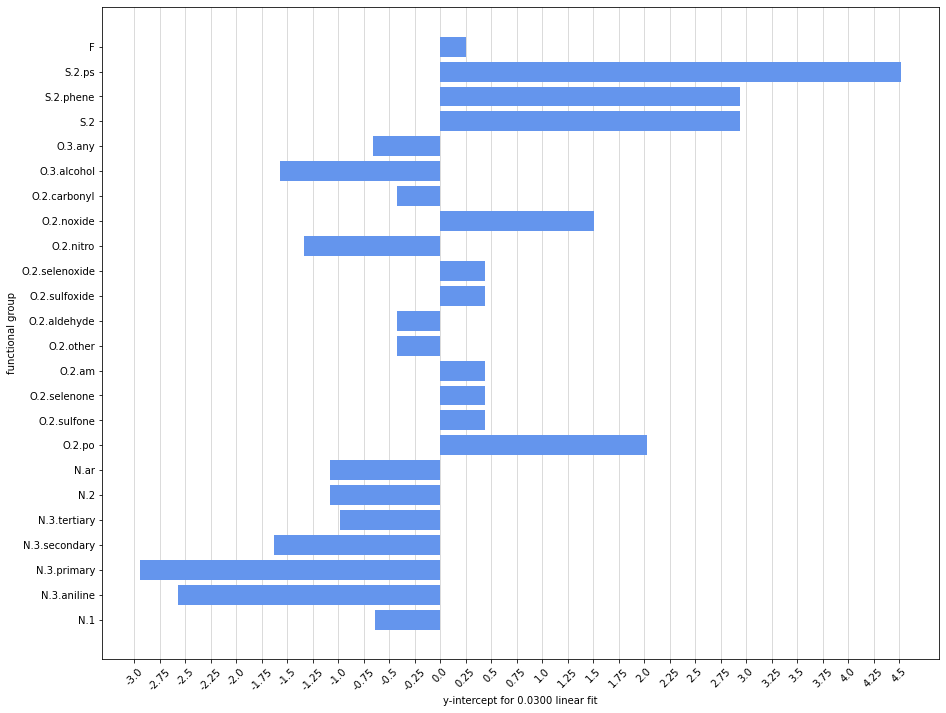

In [32]:
import matplotlib.pyplot as plt
beta_linear_03 = {'N.1':-0.64,'N.3.aniline':-2.57,'N.3.primary':-2.94, 'N.3.secondary':-1.63,'N.3.tertiary':-0.98, 'N.2':-1.08,'N.ar':-1.08,'O.2.po':2.03,'O.2.sulfone':0.44,'O.2.selenone':0.44,'O.2.am':0.44, 'O.2.other':-0.42,'O.2.aldehyde':-0.42,'O.2.sulfoxide':0.44,'O.2.selenoxide':0.44,'O.2.nitro':-1.33,'O.2.noxide':1.51,'O.2.carbonyl':-0.42,'O.3.alcohol':-1.57,'O.3.any':-0.66,'S.2':2.94,'S.2.phene':2.94,'S.2.ps':4.52,'F':0.25 }
fig, ax = plt.subplots(figsize=(15, 12));
ax.barh(*zip(*beta_linear_03.items()), zorder=3, color='cornflowerblue')
ax.xaxis.set_ticks(np.arange(-3, 4.75, 0.25))
ax.xaxis.grid(color='lightgrey', zorder=0);
ax.set_xticklabels(np.arange(-3, 4.75, 0.25), rotation=45);
ax.set_xlabel('y-intercept for 0.0300 linear fit');
ax.set_ylabel('functional group');
plt.show()

In [12]:
from scipy import spatial
def find_local_minima(ox):
    minima = []
    ox_xyz = ox[["x","y","z"]].to_numpy()
    for index, point in ox.iterrows():
        xyz = point[["x","y","z"]].to_numpy().reshape(1,3)
        charge = point["charge"]
        mat_dis_to_point = spatial.distance.cdist(ox_xyz, xyz).flatten()
        close_to_point = ox[mat_dis_to_point < 1]
        if (close_to_point["charge"].min() >= charge):
            minima.append(index)
    return minima

In [14]:
ox = k.MEPS_np.MEPS_df[k.MEPS_np.MEPS_owner == 43]
p = find_local_minima(ox)
po = ox.loc[p]
print(po)

             x         y         z   charge
29420 -3.81002 -2.172559  5.917202 -0.03587


In [6]:
limit = np.max((np.abs(k.MEPS_np.MEPS_df["charge"].min()), np.abs(k.MEPS_np.MEPS_df["charge"].max())))
pts = mlab.points3d(ox['x'], ox['y'], ox['z'], ox["charge"].T,
    colormap="RdBu", scale_mode="none", vmin=-limit, vmax=limit)
pts = mlab.points3d(k.Atom.Atoms_df["x"], k.Atom.Atoms_df["y"], k.Atom.Atoms_df["z"],color=(1,1,0))

pts = mlab.points3d(po['x'], po['y'], po['z'], scale_factor=0.5, color=(1,1,1))
mlab.show()

NameError: name 'ox' is not defined

In [6]:
inchikey_list = open("inc.txt").readlines()
from aip_footprinting.read_MEPS import MEPS
atom_type_list = ["S.2", "S.2.thiourea", "S.3", "S.O", "S.O2"]
atom_type_list = ["S.2.ps"]

In [25]:
ox = k.MEPS_p.MEPS_df[k.MEPS_p.MEPS_owner == 3]
find_local_minima(ox)

[2773, 28218]